In [1]:
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train-2.csv')
df.head()

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.shape

(1017209, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
df2=df.reindex(index=df.index[::-1])

In [7]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1


In [8]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
4,5,5,2015-07-31,4822,559,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [9]:
atr2=df2[df2.Store==931]

In [10]:
atr2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017025,931,2,2013-01-01,0,0,0,0,a,1
1015910,931,3,2013-01-02,3574,476,1,0,0,1
1014795,931,4,2013-01-03,3047,431,1,0,0,1
1013680,931,5,2013-01-04,2525,324,1,0,0,1
1012565,931,6,2013-01-05,2341,277,1,0,0,0


In [11]:
atr2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5390,931,1,2015-07-27,7024,686,1,1,0,1
4275,931,2,2015-07-28,5798,617,1,1,0,1
3160,931,3,2015-07-29,5558,662,1,1,0,1
2045,931,4,2015-07-30,5720,645,1,1,0,1
930,931,5,2015-07-31,5943,713,1,1,0,1


In [12]:
atr2.shape

(942, 9)

In [13]:
atr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1017025 to 930
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


In [14]:
atr2.Sales.value_counts()

0       67
3124     4
3375     3
3277     3
4566     3
        ..
2997     1
3979     1
4091     1
3970     1
5943     1
Name: Sales, Length: 777, dtype: int64

In [15]:
atr2['Sales']=atr2['Sales'].replace(0,112)

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
atr2.Sales.value_counts()

112     67
3124     4
3375     3
3277     3
4566     3
        ..
2997     1
3979     1
4091     1
3970     1
5943     1
Name: Sales, Length: 777, dtype: int64

In [17]:
atr2=atr2.set_index('Date')

In [18]:
atr2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,931,2,112,0,0,0,a,1
2013-01-02,931,3,3574,476,1,0,0,1
2013-01-03,931,4,3047,431,1,0,0,1
2013-01-04,931,5,2525,324,1,0,0,1
2013-01-05,931,6,2341,277,1,0,0,0


In [19]:
atr2=atr2.drop(columns=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [20]:
atr2.head()

,Sales
Date,
2013-01-01,112
2013-01-02,3574
2013-01-03,3047
2013-01-04,2525
2013-01-05,2341


In [21]:
atr2.tail()

,Sales
Date,
2015-07-27,7024
2015-07-28,5798
2015-07-29,5558
2015-07-30,5720
2015-07-31,5943


<AxesSubplot:xlabel='Date'>

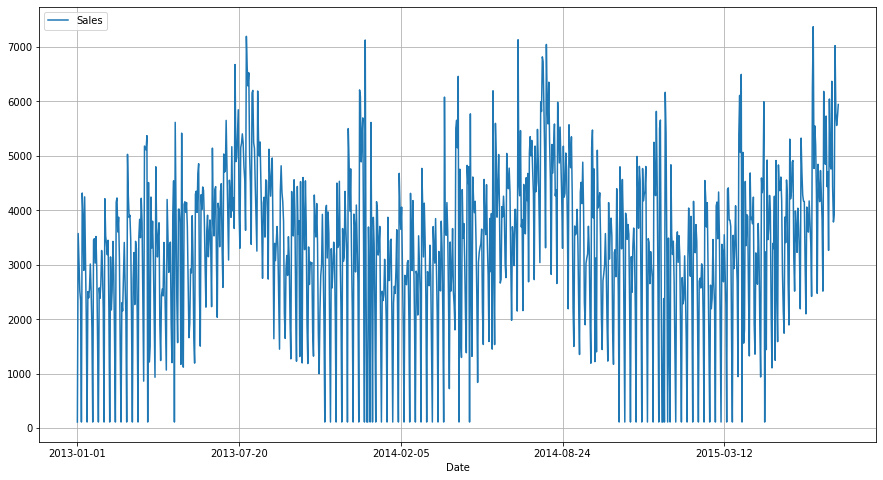

In [22]:
atr2.plot(figsize=(15,8), grid=True)

In [23]:
df1=atr2.reset_index()['Sales']

In [24]:
df1

0       112
1      3574
2      3047
3      2525
4      2341
       ... 
937    7024
938    5798
939    5558
940    5720
941    5943
Name: Sales, Length: 942, dtype: int64

In [25]:
df1.shape

(942,)

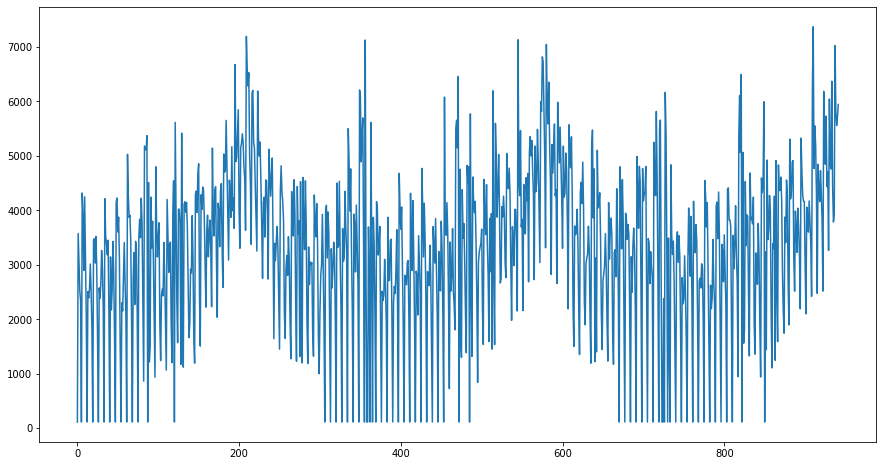

In [26]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(df1)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.5,1)) ## Scaling range is btw 0-1.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
df1

array([[0.5       ],
       [0.73842975],
       [0.70213499],
       [0.66618457],
       [0.6535124 ],
       [0.5       ],
       [0.78966942],
       [0.75971074],
       [0.69187328],
       [0.78477961],
       [0.70902204],
       [0.63367769],
       [0.5       ],
       [0.6649449 ],
       [0.65702479],
       [0.66866391],
       [0.69986226],
       [0.66535813],
       [0.61887052],
       [0.5       ],
       [0.73009642],
       [0.73188705],
       [0.70103306],
       [0.73464187],
       [0.6922865 ],
       [0.60337466],
       [0.5       ],
       [0.6696281 ],
       [0.65647383],
       [0.67451791],
       [0.71694215],
       [0.69407713],
       [0.64366391],
       [0.5       ],
       [0.78243802],
       [0.73546832],
       [0.72472452],
       [0.71157025],
       [0.72988981],
       [0.6399449 ],
       [0.5       ],
       [0.70881543],
       [0.64173554],
       [0.66604683],
       [0.72844353],
       [0.68684573],
       [0.60392562],
       [0.5  

In [29]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [30]:
training_size,test_size

(612, 330)

In [31]:
train_data

array([[0.5       ],
       [0.73842975],
       [0.70213499],
       [0.66618457],
       [0.6535124 ],
       [0.5       ],
       [0.78966942],
       [0.75971074],
       [0.69187328],
       [0.78477961],
       [0.70902204],
       [0.63367769],
       [0.5       ],
       [0.6649449 ],
       [0.65702479],
       [0.66866391],
       [0.69986226],
       [0.66535813],
       [0.61887052],
       [0.5       ],
       [0.73009642],
       [0.73188705],
       [0.70103306],
       [0.73464187],
       [0.6922865 ],
       [0.60337466],
       [0.5       ],
       [0.6696281 ],
       [0.65647383],
       [0.67451791],
       [0.71694215],
       [0.69407713],
       [0.64366391],
       [0.5       ],
       [0.78243802],
       [0.73546832],
       [0.72472452],
       [0.71157025],
       [0.72988981],
       [0.6399449 ],
       [0.5       ],
       [0.70881543],
       [0.64173554],
       [0.66604683],
       [0.72844353],
       [0.68684573],
       [0.60392562],
       [0.5  

In [32]:
test_data

array([[0.78519284],
       [0.64414601],
       [0.59559229],
       [0.74793388],
       [0.7369146 ],
       [0.73953168],
       [0.76900826],
       [0.72658402],
       [0.64690083],
       [0.58539945],
       [0.79077135],
       [0.80316804],
       [0.77623967],
       [0.82865014],
       [0.76969697],
       [0.65110193],
       [0.62300275],
       [0.70055096],
       [0.70743802],
       [0.71232782],
       [0.74758953],
       [0.71756198],
       [0.63512397],
       [0.57438017],
       [0.84669421],
       [0.86935262],
       [0.75812672],
       [0.82011019],
       [0.57637741],
       [0.70743802],
       [0.5887741 ],
       [0.84373278],
       [0.7707989 ],
       [0.77596419],
       [0.7899449 ],
       [0.73443526],
       [0.63636364],
       [0.59166667],
       [0.67865014],
       [0.68753444],
       [0.69841598],
       [0.73836088],
       [0.69538567],
       [0.62775482],
       [0.57706612],
       [0.77747934],
       [0.70612948],
       [0.742

In [33]:
len(train_data), len(test_data)

(612, 330)

In [34]:
atr2.iloc[0:612] #train

,Sales
Date,
2013-01-01,112
2013-01-02,3574
2013-01-03,3047
2013-01-04,2525
2013-01-05,2341
...,...
2014-08-31,2191
2014-09-01,5571
2014-09-02,5019


Train ranges from the date 2013/01/01 to 2014/09/04

In [35]:
atr2.iloc[612:]  #test

,Sales
Date,
2014-09-05,4253
2014-09-06,2205
2014-09-07,1500
2014-09-08,3712
2014-09-09,3552
...,...
2015-07-27,7024
2015-07-28,5798
2015-07-29,5558


Test ranges from the date 2014/09/05 to 2015/07/31

In [36]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [37]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [38]:
print(X_train)

[[0.5        0.73842975 0.70213499 ... 0.82279614 0.74800275 0.70874656]
 [0.73842975 0.70213499 0.66618457 ... 0.74800275 0.70874656 0.73519284]
 [0.70213499 0.66618457 0.6535124  ... 0.70874656 0.73519284 0.75199725]
 ...
 [0.68539945 0.6018595  0.75750689 ... 0.81990358 0.75130854 0.64318182]
 [0.6018595  0.75750689 0.69022039 ... 0.75130854 0.64318182 0.87596419]
 [0.75750689 0.69022039 0.76370523 ... 0.64318182 0.87596419 0.83794766]]


In [39]:
print(y_train)

[0.73519284 0.75199725 0.6226584  0.57775482 0.6600551  0.66825069
 0.65950413 0.72713499 0.68292011 0.62424242 0.56570248 0.78147383
 0.73202479 0.68932507 0.72465565 0.72747934 0.62458678 0.57506887
 0.75950413 0.80502755 0.5        0.87899449 0.76935262 0.65440771
 0.60041322 0.76928375 0.76907713 0.75213499 0.57293388 0.86535813
 0.67190083 0.56942149 0.77548209 0.77858127 0.76508264 0.77761708
 0.7469697  0.68071625 0.60668044 0.62465565 0.69338843 0.68863636
 0.76095041 0.70592287 0.60592287 0.57451791 0.78829201 0.79201102
 0.76515152 0.81404959 0.82665289 0.66260331 0.59600551 0.78746556
 0.76887052 0.79724518 0.79318182 0.7565427  0.69607438 0.6453168
 0.74139118 0.76157025 0.70902204 0.73705234 0.75557851 0.71694215
 0.64586777 0.84641873 0.76081267 0.73539945 0.79393939 0.79772727
 0.70516529 0.63243802 0.77672176 0.76811295 0.72169421 0.79146006
 0.80151515 0.71997245 0.67024793 0.83898072 0.81618457 0.8177686
 0.88147383 0.82134986 0.76935262 0.70488981 0.80585399 0.787258

In [40]:
print(X_train.shape), print(y_train.shape)

(511, 100)
(511,)


(None, None)

In [41]:
print(X_test.shape), print(ytest.shape)

(229, 100)
(229,)


(None, None)

In [42]:
X_train.shape

(511, 100)

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1] )
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [44]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
model=Sequential()
model.add(LSTM(50, input_shape=(1,100)))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam', metrics=['mape'])

2022-03-24 00:04:39.814665: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-24 00:04:39.815771: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 32,801
Trainable params: 32,801
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-24 00:04:42.165702: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_2436_2618' and '__inference___backward_standard_lstm_2741_3226_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_3347' both implement 'lstm_573ed62e-d0f1-497a-8703-a923f6388383' but their signatures do not match.


 64/511 [==>...........................] - ETA: 12s - loss: 0.9089 - mape: 120.2689

2022-03-24 00:04:43.340215: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_3564' and '__inference_standard_lstm_3564_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_3925' both implement 'lstm_8aebbdcd-9980-4821-9e99-d36a87702aed' but their signatures do not match.


511/511 [==============================] - 2s 5ms/sample - loss: 0.5645 - mape: 76.2384 - val_loss: 0.1904 - val_mape: 24.8831
Epoch 2/150
511/511 [==============================] - 0s 176us/sample - loss: 0.1467 - mape: 21.3411 - val_loss: 0.1237 - val_mape: 19.4800
Epoch 3/150
511/511 [==============================] - 0s 166us/sample - loss: 0.0968 - mape: 13.5805 - val_loss: 0.1064 - val_mape: 14.3034
Epoch 4/150
511/511 [==============================] - 0s 166us/sample - loss: 0.0857 - mape: 12.2984 - val_loss: 0.0880 - val_mape: 13.8263
Epoch 5/150
511/511 [==============================] - 0s 166us/sample - loss: 0.0771 - mape: 11.2764 - val_loss: 0.0843 - val_mape: 12.0180
Epoch 6/150
511/511 [==============================] - 0s 165us/sample - loss: 0.0738 - mape: 10.5198 - val_loss: 0.0789 - val_mape: 12.0785
Epoch 7/150
511/511 [==============================] - 0s 164us/sample - loss: 0.0738 - mape: 10.8045 - val_loss: 0.0795 - val_mape: 11.4914
Epoch 8/150
511/511 [======

In [48]:
modela=Sequential()
modela.add(LSTM(30, input_shape=(1,100)))
modela.add(Dense(30,activation='relu'))
modela.add(Dense(1))
modela.compile(loss='mae',optimizer='adam', metrics=['mape'])

In [49]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                15720     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 16,681
Trainable params: 16,681
Non-trainable params: 0
_________________________________________________________________


In [50]:
modela.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-24 00:08:04.352971: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_13082_13567_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_13688' and '__inference___backward_cudnn_lstm_with_fallback_12777_12959' both implement 'lstm_682ccbb1-ef02-48f4-92c6-2e5622b84399' but their signatures do not match.


 64/511 [==>...........................] - ETA: 12s - loss: 0.7039 - mape: 94.8292

2022-03-24 00:08:05.516509: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_13905_specialized_for_sequential_1_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_14266' and '__inference_standard_lstm_13905' both implement 'lstm_db97d47e-048f-4019-b96d-26651238b197' but their signatures do not match.


511/511 [==============================] - 2s 4ms/sample - loss: 0.4257 - mape: 57.2705 - val_loss: 0.1040 - val_mape: 14.0936
Epoch 2/150
511/511 [==============================] - 0s 158us/sample - loss: 0.1200 - mape: 17.9568 - val_loss: 0.0893 - val_mape: 14.0652
Epoch 3/150
511/511 [==============================] - 0s 146us/sample - loss: 0.0885 - mape: 12.2728 - val_loss: 0.0924 - val_mape: 12.8870
Epoch 4/150
511/511 [==============================] - 0s 146us/sample - loss: 0.0814 - mape: 11.9461 - val_loss: 0.0852 - val_mape: 13.3278
Epoch 5/150
511/511 [==============================] - 0s 143us/sample - loss: 0.0771 - mape: 11.2718 - val_loss: 0.0813 - val_mape: 11.9077
Epoch 6/150
511/511 [==============================] - 0s 136us/sample - loss: 0.0743 - mape: 10.9403 - val_loss: 0.0811 - val_mape: 12.5250
Epoch 7/150
511/511 [==============================] - 0s 145us/sample - loss: 0.0741 - mape: 10.8414 - val_loss: 0.0800 - val_mape: 11.7171
Epoch 8/150
511/511 [======

***Let's Hypertune***

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
!pip install -q -U keras-tuner

In [53]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [54]:
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dropout

***Hypertune***

In [55]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=30,max_value=300,step=30),return_sequences=True, input_shape=(1,100)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=30,max_value=300,step=30),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=30,max_value=300,step=30)))
    model.add(Dense(hp.Int(f'rnn_{i}_units',min_value=16,max_value=256,step=16),activation="relu"))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mae',metrics=['mape'])
    return model

In [56]:
tuner= RandomSearch(
        build_model,
        objective='mape',
        max_trials=5,
        executions_per_trial=3,
        directory='projd',
        project_name='Rossmann forecasting'
        )

In [57]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
lstm_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
rnn_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [58]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,ytest),
)

Trial 5 Complete [00h 01m 40s]
mape: 10.796109199523926

Best mape So Far: 5.561656951904297
Total elapsed time: 00h 09m 22s
INFO:tensorflow:Oracle triggered exit


In [59]:
tuner.results_summary()

Results summary
Results in projd/Rossmann forecasting
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 120
n_layers: 3
lstm_0_units: 270
layer_2_neurons: 150
rnn_0_units: 208
Dropout_rate: 0.0
learning_rate: 0.001
lstm_1_units: 270
lstm_2_units: 150
lstm_3_units: 180
rnn_3_units: 48
rnn_2_units: 112
Score: 5.561656951904297
Trial summary
Hyperparameters:
input_unit: 180
n_layers: 1
lstm_0_units: 90
layer_2_neurons: 60
rnn_0_units: 160
Dropout_rate: 0.2
learning_rate: 0.001
lstm_1_units: 270
lstm_2_units: 60
lstm_3_units: 180
rnn_3_units: 160
Score: 7.645081996917725
Trial summary
Hyperparameters:
input_unit: 180
n_layers: 2
lstm_0_units: 210
layer_2_neurons: 60
rnn_0_units: 144
Dropout_rate: 0.1
learning_rate: 0.001
lstm_1_units: 90
lstm_2_units: 180
lstm_3_units: 150
rnn_3_units: 240
rnn_2_units: 144
rnn_1_units: 16
Score: 10.796109199523926
Trial summary
Hyperparameters:
input_unit: 180
n_layers: 4
lstm_0_units: 60
layer_2_neurons: 270
rnn_0_units: 48
Dropout_rate: 0

In [60]:
from tensorflow.keras import optimizers

In [61]:
modelcc=Sequential()
modelcc.add(LSTM(120, return_sequences=True, input_shape=(1,100)))
modelcc.add(LSTM(270, return_sequences=True))
modelcc.add(LSTM(270, return_sequences=True))
modelcc.add(LSTM(150, return_sequences=True))
modelcc.add(LSTM(180, return_sequences=True))
modelcc.add(LSTM(150))
modelcc.add(Dense(208, activation='relu'))
modelcc.add(Dropout(0.0))
modelcc.add(Dense(112, activation='relu'))
modelcc.add(Dense(48, activation='relu'))
modelcc.add(Dense(1))
sgd=optimizers.SGD(lr=0.001)
modelcc.compile(loss='mae',optimizer='adam', metrics=['mape'])

In [62]:
modelcc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 120)            106080    
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 270)            422280    
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 270)            584280    
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 150)            252600    
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 180)            238320    
_________________________________________________________________
lstm_9 (LSTM)                (None, 150)               198600    
_________________________________________________________________
dense_2 (Dense)              (None, 208)              

In [63]:
modelcc.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-24 00:23:24.341256: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_306568_306750' and '__inference___backward_standard_lstm_311904_312389_specialized_for_StatefulPartitionedCall_5_at___inference_distributed_function_312586' both implement 'lstm_6018f96e-713f-48bd-94fa-533f6c892674' but their signatures do not match.


448/511 [=========================>....] - ETA: 1s - loss: 0.6983 - mape: 94.9515

2022-03-24 00:23:30.303119: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_314214_specialized_for_sequential_1_lstm_7_StatefulPartitionedCall_at___inference_distributed_function_315528' and '__inference_standard_lstm_314214' both implement 'lstm_16f36bfa-b9fa-4cc7-9133-3dda688b8d69' but their signatures do not match.


511/511 [==============================] - 11s 21ms/sample - loss: 0.6881 - mape: 93.7825 - val_loss: 0.5962 - val_mape: 82.0353
Epoch 2/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.4415 - mape: 59.3442 - val_loss: 0.0852 - val_mape: 13.2838
Epoch 3/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.1432 - mape: 20.6048 - val_loss: 0.1397 - val_mape: 18.4295
Epoch 4/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.1030 - mape: 14.1896 - val_loss: 0.1123 - val_mape: 17.8357
Epoch 5/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.0881 - mape: 13.0260 - val_loss: 0.0962 - val_mape: 13.4020
Epoch 6/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.0851 - mape: 12.0999 - val_loss: 0.0931 - val_mape: 14.7172
Epoch 7/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.0818 - mape: 12.0377 - val_loss: 0.0875 - val_mape: 12.6527
Epoch 8/150
511/511 [================

In [64]:
#Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2022-03-24 00:45:01.624233: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_322295' and '__inference_standard_lstm_322184_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_322493' both implement 'lstm_bbd76755-be86-429d-b85f-7b416313cc43' but their signatures do not match.


In [65]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [66]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3563.965296929729

In [67]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3459.531783095727

In [68]:
print(test_predict)

[[ 6.12228638e+02]
 [ 3.98908862e+03]
 [ 3.49576807e+03]
 [ 3.70883203e+03]
 [ 4.44618701e+03]
 [ 3.86317285e+03]
 [ 2.77845117e+03]
 [ 1.01668634e+03]
 [ 4.16098779e+03]
 [ 3.84405835e+03]
 [ 3.70553638e+03]
 [ 4.33563232e+03]
 [ 2.91433862e+03]
 [ 1.51020947e+03]
 [-3.15258301e+02]
 [ 3.78816870e+03]
 [ 4.05822852e+03]
 [ 3.98079419e+03]
 [ 4.59765381e+03]
 [ 3.27765332e+03]
 [ 2.37028906e+03]
 [ 3.30925980e+01]
 [ 3.94519434e+03]
 [ 3.12214404e+03]
 [ 2.51102246e+03]
 [ 2.96675342e+03]
 [ 2.42788037e+03]
 [ 1.58895935e+03]
 [-3.36751099e+02]
 [ 4.05510767e+03]
 [ 3.19683838e+03]
 [ 3.06930347e+03]
 [ 3.31972754e+03]
 [ 3.04575342e+03]
 [ 1.76937390e+03]
 [ 1.26718002e+02]
 [ 4.01797070e+03]
 [ 3.13994751e+03]
 [ 2.64956860e+03]
 [ 2.79021973e+03]
 [ 2.38278027e+03]
 [ 1.32620410e+03]
 [ 1.43043423e+01]
 [ 3.92293628e+03]
 [ 3.15791699e+03]
 [ 2.94584912e+03]
 [ 2.80931152e+03]
 [ 2.74902979e+03]
 [ 1.55631592e+03]
 [-3.02222290e+02]
 [ 3.97770605e+03]
 [ 3.61433789e+03]
 [ 2.8424519

In [69]:
len(train_predict)

511

In [70]:
len(test_predict)

229

In [71]:
test_data.shape

(330, 1)

In [72]:
test_predict.shape

(229, 1)

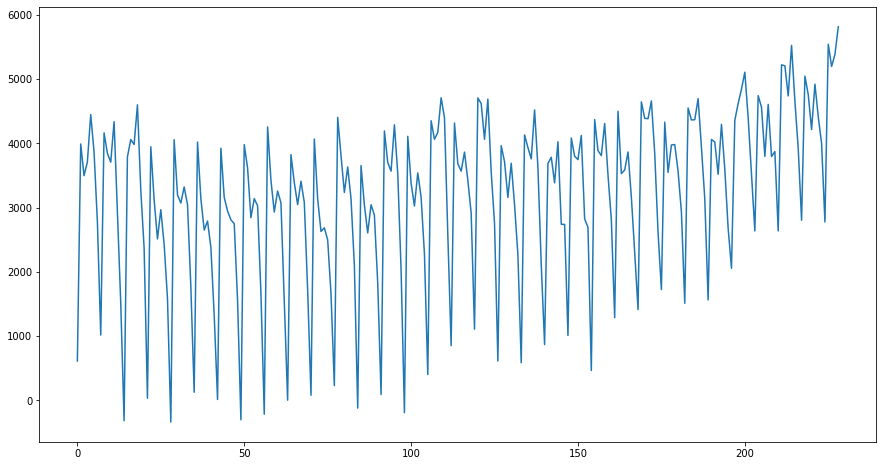

In [73]:
plt.plot(test_predict)

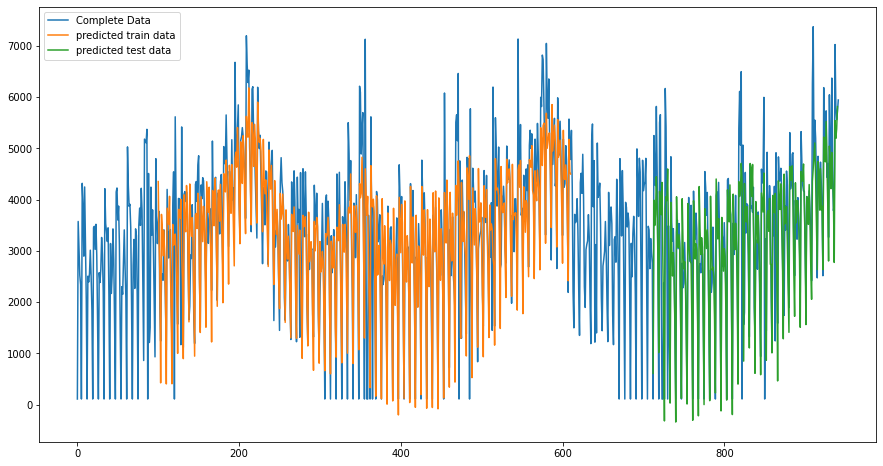

In [74]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Complete Data')
plt.plot(trainPredictPlot, label='predicted train data')
plt.plot(testPredictPlot, label='predicted test data')
plt.legend()
plt.show()

In [75]:
len(test_data)

330

In [76]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 100)

In [77]:
temp_input=list(x_input) # converting to a list
temp_input=temp_input[0].tolist() # storing the values here

In [78]:
temp_input #All my test_data is present here (previous 100 days data)

[0.7511707988980716,
 0.7101928374655647,
 0.6205234159779615,
 0.5569559228650138,
 0.8086776859504132,
 0.7900826446280992,
 0.802892561983471,
 0.9050964187327823,
 0.5,
 0.7151515151515151,
 0.5915977961432507,
 0.83133608815427,
 0.7307162534435262,
 0.7441460055096418,
 0.7865702479338843,
 0.7664600550964187,
 0.6367768595041322,
 0.5684573002754821,
 0.7258953168044077,
 0.7193526170798898,
 0.7856060606060606,
 0.578030303030303,
 0.8307162534435262,
 0.6650137741046832,
 0.6016528925619835,
 0.8251377410468319,
 0.7927685950413224,
 0.7930440771349863,
 0.8098484848484848,
 0.7802341597796143,
 0.6877410468319559,
 0.6395316804407714,
 0.61232782369146,
 0.759228650137741,
 0.7268595041322314,
 0.806129476584022,
 0.787396694214876,
 0.6761019283746557,
 0.6227272727272727,
 0.8577823691460055,
 0.7822314049586776,
 0.7907713498622589,
 0.8288567493112948,
 0.8307162534435262,
 0.7074380165289256,
 0.665564738292011,
 0.7668044077134986,
 0.7443526170798898,
 0.71460055096418

In [79]:
len(temp_input)

100

In [80]:
# demonstrate prediction for next 80 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<80):
    
    if(len(temp_input)>100): # Now if there are greater than 100 elements, start from the 1st index element
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1,n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps)) # All the previous 100 days data will be passed here
        yhat = model.predict(x_input, verbose=0) # it will be predicted here
        print(yhat[0]) # I obtain my yhat value
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # Now I'm adding my yhat value inside my final o/p i.e lst_output
        i=i+1                            # Now I'm also adding my yhat value in my previous i/p i.e temp_input
                                         # Now temp_input will have 101 elements.
    

print(lst_output)

[0.8043113]
101
1 day input [0.71019284 0.62052342 0.55695592 0.80867769 0.79008264 0.80289256
 0.90509642 0.5        0.71515152 0.5915978  0.83133609 0.73071625
 0.74414601 0.78657025 0.76646006 0.63677686 0.5684573  0.72589532
 0.71935262 0.78560606 0.5780303  0.83071625 0.66501377 0.60165289
 0.82513774 0.7927686  0.79304408 0.80984848 0.78023416 0.68774105
 0.63953168 0.61232782 0.75922865 0.7268595  0.80612948 0.78739669
 0.67610193 0.62272727 0.85778237 0.7822314  0.79077135 0.82885675
 0.83071625 0.70743802 0.66556474 0.76680441 0.74435262 0.71460055
 0.77045455 0.74483471 0.71115702 0.64318182 0.85909091 0.81646006
 0.78719008 0.77940771 0.77899449 0.6988292  0.63677686 0.77190083
 0.75984848 0.74022039 0.77961433 0.75206612 0.72548209 0.6588843
 0.92320937 1.         0.82073003 0.87451791 0.85020661 0.78946281
 0.66267218 0.82596419 0.7927686  0.77871901 0.81804408 0.78918733
 0.75495868 0.66556474 0.91818182 0.86363636 0.82603306 0.88698347
 0.79772727 0.81639118 0.71707989 0

In [81]:
lst_output

[[0.8043112754821777],
 [0.7164193391799927],
 [0.8817960023880005],
 [0.8360518217086792],
 [0.8087217807769775],
 [0.8493287563323975],
 [0.7966227531433105],
 [0.775782585144043],
 [0.6883728504180908],
 [0.8706587553024292],
 [0.827476978302002],
 [0.8197154998779297],
 [0.8334085941314697],
 [0.8196041584014893],
 [0.7519249320030212],
 [0.6867750287055969],
 [0.8608038425445557],
 [0.8021352291107178],
 [0.7832086086273193],
 [0.8003441095352173],
 [0.7769948244094849],
 [0.7074106931686401],
 [0.6636441946029663],
 [0.8242443799972534],
 [0.7876664400100708],
 [0.768452525138855],
 [0.7933903336524963],
 [0.7599619626998901],
 [0.6921785473823547],
 [0.6418286561965942],
 [0.8115053772926331],
 [0.7554131150245667],
 [0.7452579736709595],
 [0.766040563583374],
 [0.7252874374389648],
 [0.6534377932548523],
 [0.6026694178581238],
 [0.7787295579910278],
 [0.7318904399871826],
 [0.7187532186508179],
 [0.7486581802368164],
 [0.7173277735710144],
 [0.6477046012878418],
 [0.59984427690

In [82]:
len(lst_output)

80

In [83]:
fnl_output=scaler.inverse_transform(lst_output)

In [84]:
fnl_output

array([[4530.59972   ],
       [3254.40880489],
       [5655.67795467],
       [4991.47245121],
       [4594.64025688],
       [5184.25354195],
       [4418.96237564],
       [4116.36313629],
       [2847.17378807],
       [5493.96512699],
       [4866.96572495],
       [4754.26905823],
       [4953.09278679],
       [4752.65237999],
       [3769.95001268],
       [2823.97341681],
       [5350.87179375],
       [4499.00352669],
       [4224.18899727],
       [4472.99647045],
       [4133.96485043],
       [3123.60326481],
       [2488.11370564],
       [4820.02839756],
       [4288.91670895],
       [4009.93066502],
       [4372.02764463],
       [3886.6476984 ],
       [2902.43250799],
       [2171.35208797],
       [4635.05807829],
       [3820.59843016],
       [3673.1457777 ],
       [3974.90898323],
       [3383.17359161],
       [2339.91675806],
       [1602.7599473 ],
       [4159.15318203],
       [3479.04918861],
       [3288.29673481],
       [3722.51677704],
       [3267.599

In [85]:
import matplotlib.pyplot as plt

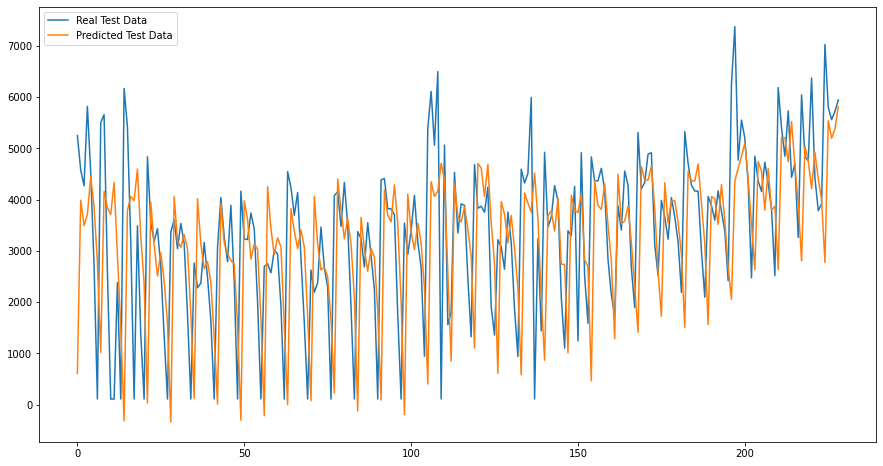

In [86]:
plt.plot(scaler.inverse_transform(df1[713:]),label='Real Test Data')
plt.plot(test_predict, label='Predicted Test Data')
plt.legend()
plt.show()

In [87]:
date = pd.date_range(start='2015/08/01', periods=80, freq='D')
date

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01',
               '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05',
               '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09',
               '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13',
               '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20', '2015-09-21',
               '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25',
      

In [88]:
ff=pd.DataFrame(fnl_output, columns=['Forecast'])

In [89]:
ff

,Forecast
0,4530.599720
1,3254.408805
2,5655.677955
3,4991.472451
4,4594.640257
...,...
75,2800.276272
76,1825.086958
77,968.242299
78,47.777284


In [90]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [91]:
ff

,Forecast,Time_Stamp
0,4530.599720,2015-08-01
1,3254.408805,2015-08-02
2,5655.677955,2015-08-03
3,4991.472451,2015-08-04
4,4594.640257,2015-08-05
...,...,...
75,2800.276272,2015-10-15
76,1825.086958,2015-10-16
77,968.242299,2015-10-17
78,47.777284,2015-10-18


In [92]:
ff=ff.set_index('Time_Stamp')

In [93]:
ff

,Forecast
Time_Stamp,
2015-08-01,4530.599720
2015-08-02,3254.408805
2015-08-03,5655.677955
2015-08-04,4991.472451
2015-08-05,4594.640257
...,...
2015-10-15,2800.276272
2015-10-16,1825.086958
2015-10-17,968.242299


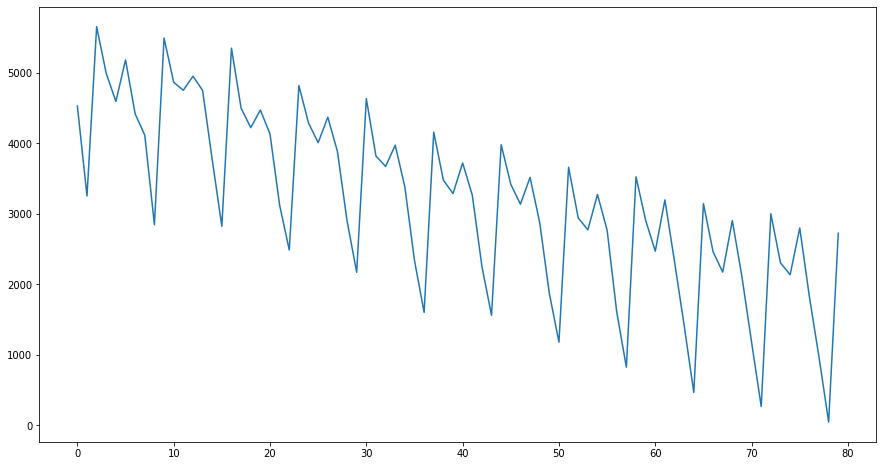

In [94]:
plt.plot(fnl_output)

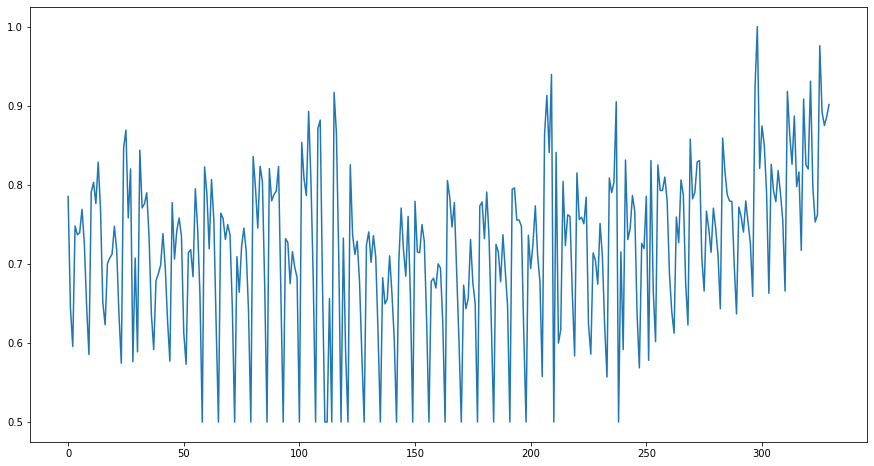

In [95]:
plt.plot(test_data)

In [96]:
day_new1=np.arange(1,331)
day_pred1=np.arange(331,411)

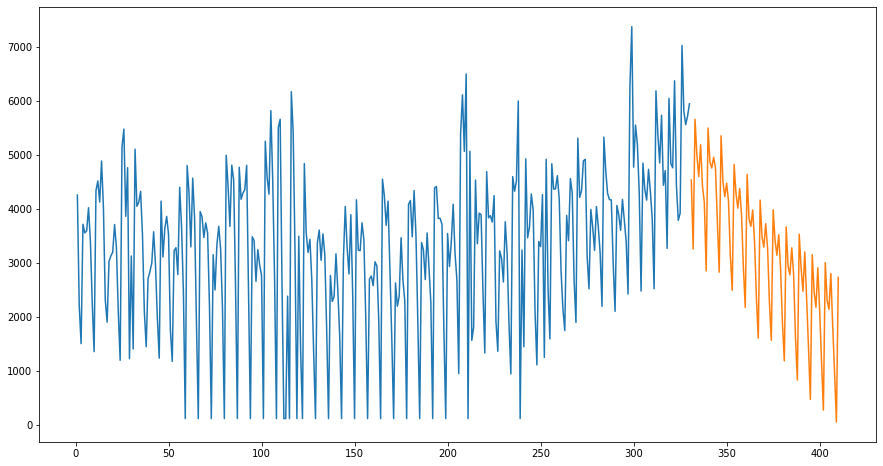

In [97]:
plt.plot(day_new1,scaler.inverse_transform(df1[612:]))
plt.plot(day_pred1,fnl_output)

In [98]:
daynew2=np.arange(1,230)
day3fore=np.arange(230,310)

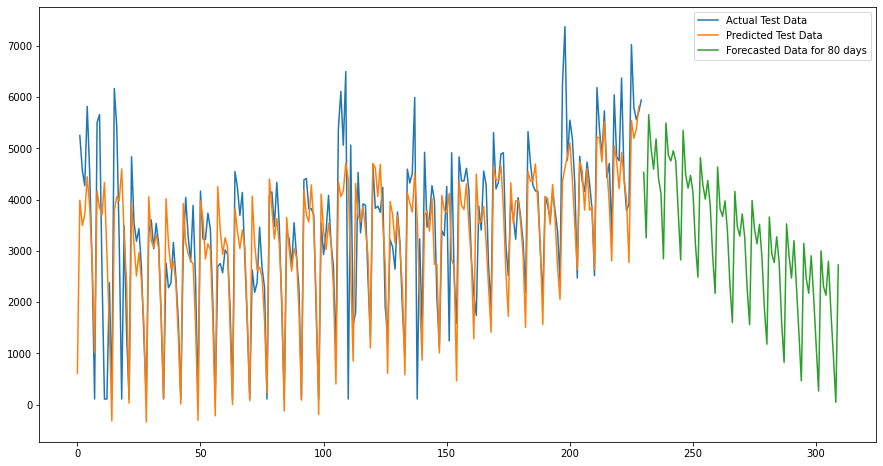

In [99]:
plt.plot(daynew2,scaler.inverse_transform(df1[713:]), label='Actual Test Data')
plt.plot(test_predict,label='Predicted Test Data')
plt.plot(day3fore,fnl_output, label='Forecasted Data for 80 days')
plt.legend()
plt.show()

In [100]:
vv=atr2.iloc[212:292]
vv.head()

,Sales
Date,
2013-08-01,6525
2013-08-02,5025
2013-08-03,4493
2013-08-04,3375
2013-08-05,6155


In [101]:
vv.tail()

,Sales
Date,
2013-10-15,2638
2013-10-16,3052
2013-10-17,3016
2013-10-18,3041
2013-10-19,1760


In [102]:
len(vv)

80

In [103]:
jj=atr2.iloc[577:657]

In [104]:
jj.head()

,Sales
Date,
2014-08-01,5781
2014-08-02,4961
2014-08-03,3312
2014-08-04,7046
2014-08-05,5968


In [105]:
jj.tail()

,Sales
Date,
2014-10-15,2993
2014-10-16,3573
2014-10-17,2949
2014-10-18,1967
2014-10-19,1231


In [106]:
len(jj)

80

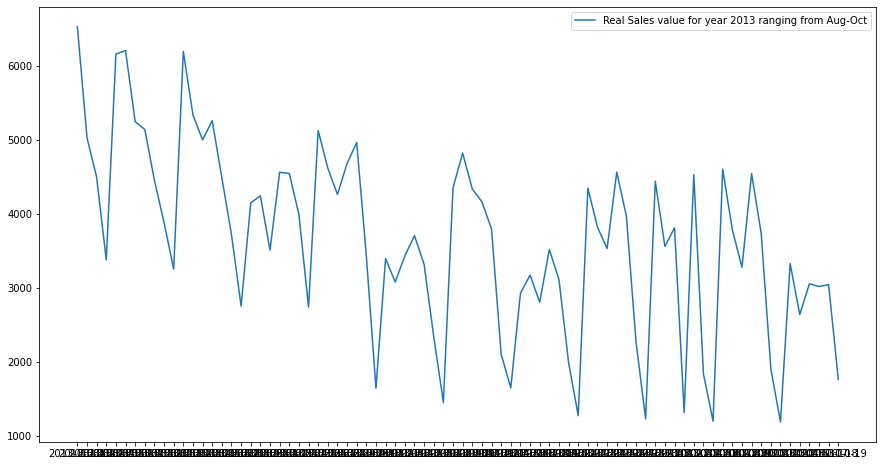

In [107]:
plt.plot(vv['Sales'], label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

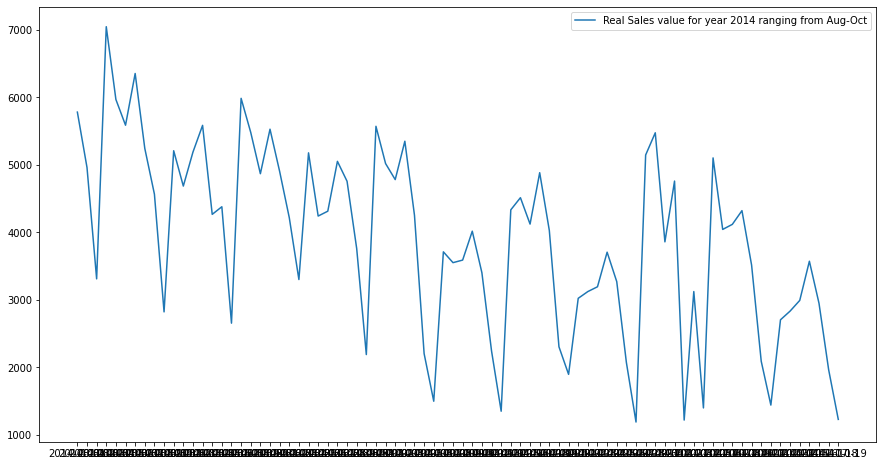

In [108]:
plt.plot(jj['Sales'],label='Real Sales value for year 2014 ranging from Aug-Oct')
plt.legend()
plt.show()

In [109]:
a1=vv.reset_index()['Sales']

In [110]:
a1

0     6525
1     5025
2     4493
3     3375
4     6155
      ... 
75    2638
76    3052
77    3016
78    3041
79    1760
Name: Sales, Length: 80, dtype: int64

In [111]:
len(a1)

80

In [112]:
b1=jj.reset_index()['Sales']

In [113]:
b1

0     5781
1     4961
2     3312
3     7046
4     5968
      ... 
75    2993
76    3573
77    2949
78    1967
79    1231
Name: Sales, Length: 80, dtype: int64

In [114]:
len(b1)

80

In [115]:
len(train_predict)

511

In [116]:
atr2.iloc[101:612]

,Sales
Date,
2013-04-12,3771
2013-04-13,1893
2013-04-14,1241
2013-04-15,2436
2013-04-16,2555
...,...
2014-08-31,2191
2014-09-01,5571
2014-09-02,5019


In [117]:
date1 = pd.date_range(start='2013/04/12', periods=511, freq='D')
date1

DatetimeIndex(['2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
               '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19',
               '2013-04-20', '2013-04-21',
               ...
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04'],
              dtype='datetime64[ns]', length=511, freq='D')

In [118]:
njc=pd.DataFrame(train_predict, columns=['Predicted Train Data'])

In [119]:
njc

,Predicted Train Data
0,4352.283691
1,3210.244385
2,2580.438232
3,426.790955
4,3712.228271
...,...
506,3510.686035
507,2418.399170
508,5175.425781
509,4539.434082


In [120]:
njc['time_Stamp'] = pd.DataFrame(date1)

In [121]:
njc

,Predicted Train Data,time_Stamp
0,4352.283691,2013-04-12
1,3210.244385,2013-04-13
2,2580.438232,2013-04-14
3,426.790955,2013-04-15
4,3712.228271,2013-04-16
...,...,...
506,3510.686035,2014-08-31
507,2418.399170,2014-09-01
508,5175.425781,2014-09-02
509,4539.434082,2014-09-03


In [122]:
njc=njc.set_index('time_Stamp')

In [123]:
njc

,Predicted Train Data
time_Stamp,
2013-04-12,4352.283691
2013-04-13,3210.244385
2013-04-14,2580.438232
2013-04-15,426.790955
2013-04-16,3712.228271
...,...
2014-08-31,3510.686035
2014-09-01,2418.399170
2014-09-02,5175.425781


In [124]:
njc.iloc[111:191]

,Predicted Train Data
time_Stamp,
2013-08-01,5217.179199
2013-08-02,6178.657715
2013-08-03,5510.338867
2013-08-04,4182.872070
2013-08-05,3508.400391
...,...
2013-10-15,3754.460938
2013-10-16,2789.174072
2013-10-17,2914.790283


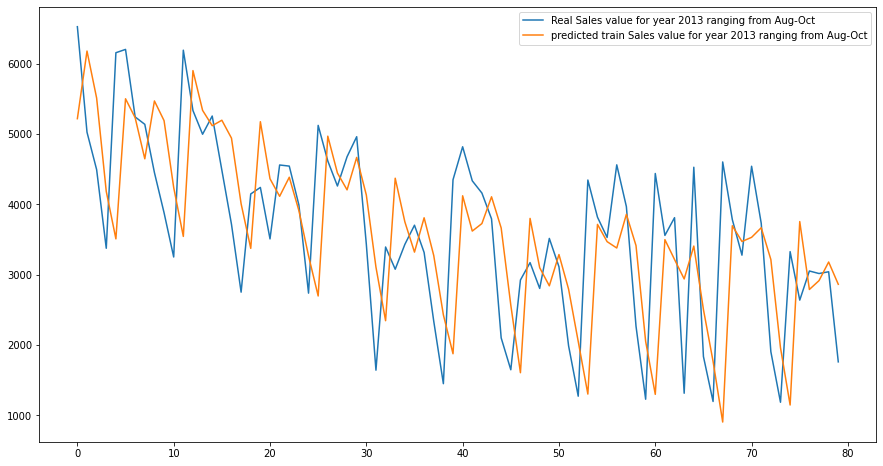

In [125]:
plt.plot(a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [126]:
daynewa=np.arange(1,81)
day3foreb=np.arange(81,161)

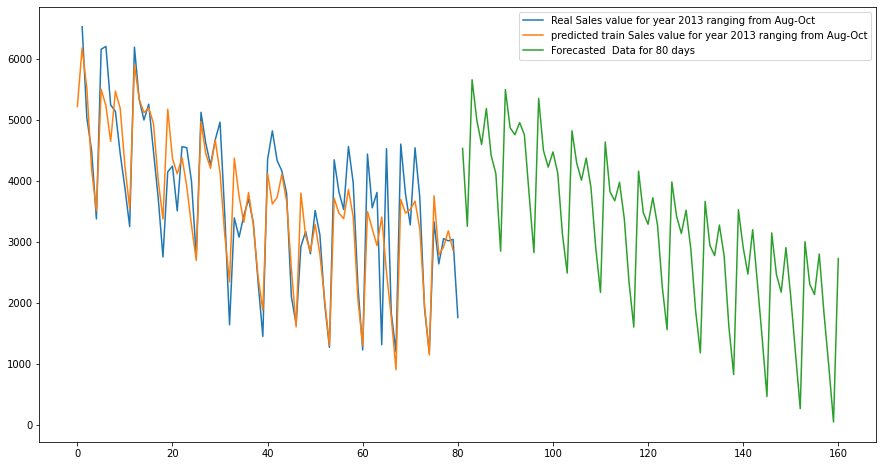

In [127]:
plt.plot(daynewa,a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.plot(day3foreb,fnl_output, label='Forecasted  Data for 80 days')
plt.legend()
plt.show()

In [128]:
nn=atr2.iloc[577:612]
nn.head()

,Sales
Date,
2014-08-01,5781
2014-08-02,4961
2014-08-03,3312
2014-08-04,7046
2014-08-05,5968


In [129]:
nn.tail()

,Sales
Date,
2014-08-31,2191
2014-09-01,5571
2014-09-02,5019
2014-09-03,4782
2014-09-04,5350


In [130]:
len(nn)

35

In [131]:
c1=nn.reset_index()['Sales']

In [132]:
c1

0     5781
1     4961
2     3312
3     7046
4     5968
5     5587
6     6353
7     5244
8     4566
9     2823
10    5209
11    4686
12    5189
13    5585
14    4267
15    4380
16    2656
17    5985
18    5480
19    4869
20    5528
21    4903
22    4219
23    3302
24    5178
25    4242
26    4314
27    5052
28    4757
29    3761
30    2191
31    5571
32    5019
33    4782
34    5350
Name: Sales, dtype: int64

In [133]:
len(c1)

35

In [134]:
njc.iloc[476:511]

,Predicted Train Data
time_Stamp,
2014-08-01,5442.047852
2014-08-02,5492.060059
2014-08-03,4717.952637
2014-08-04,3149.342773
2014-08-05,5683.896973
2014-08-06,5002.962891
2014-08-07,5120.955566
2014-08-08,5288.536133
2014-08-09,5299.376953


In [135]:
aar1=np.arange(1,36)
aar2=np.arange(36,71)

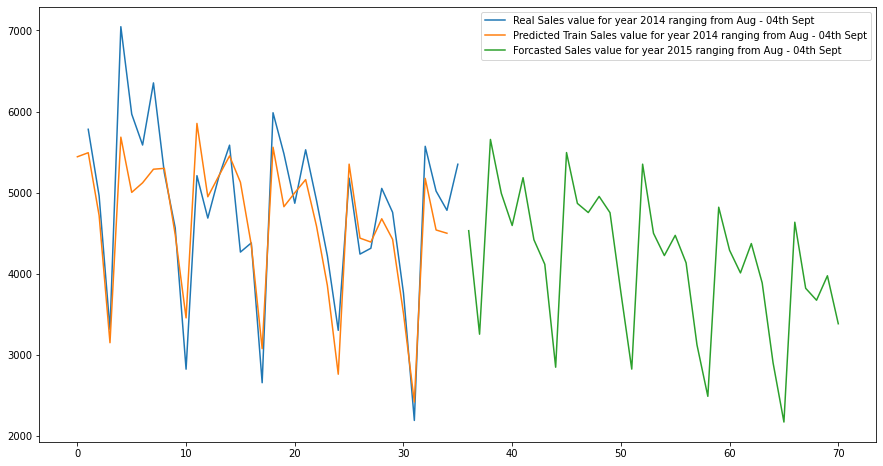

In [136]:
plt.plot(aar1,c1,label='Real Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(train_predict[476:511], label='Predicted Train Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(aar2,fnl_output[0:35], label='Forcasted Sales value for year 2015 ranging from Aug - 04th Sept')
plt.legend()
plt.show()

In [137]:
import jovian

In [138]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/ismailzain1697/lstm-model-of-store-931


'https://jovian.ai/ismailzain1697/lstm-model-of-store-931'